In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.columns
df.info(verbose=True)
df.isnull().sum()#checking null values if present
df.describe().T#



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [3]:
diabetes=df.copy(deep=True)
v=["Glucose" ,"BloodPressure" ,"SkinThickness" ,"Insulin","BMI","DiabetesPedigreeFunction","Age"]
x=diabetes[v].replace(0,np.NaN)
# diabetes.iloc[:,0:6]
# print(x.isnull().sum())
x


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

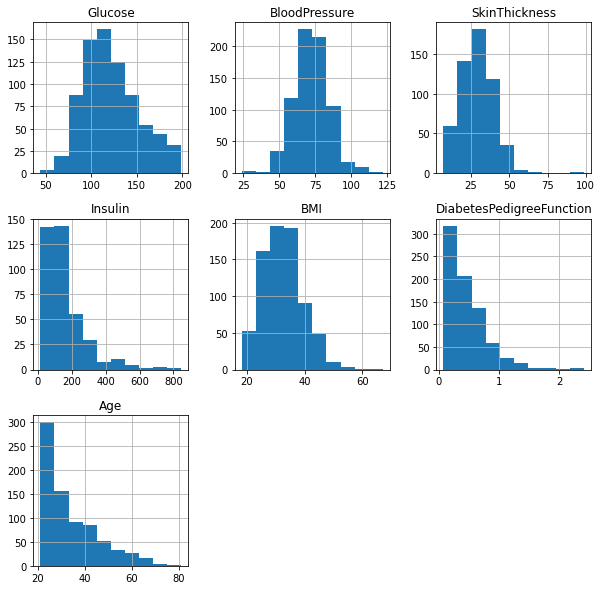

In [4]:

x.hist(figsize=(10,10))
# z.hist(figsize=(10,10))

In [5]:
s=x.copy()
s["Glucose"].fillna(s["Glucose"].mean(),inplace=True)
s["BloodPressure"].fillna(s["BloodPressure"].mean(),inplace=True)
s["SkinThickness"].fillna(s["SkinThickness"].median(),inplace=True)
s["Insulin"].fillna(s["Insulin"].median(),inplace=True)
s["BMI"].fillna(s["BMI"].median(),inplace=True)
# s["Pregnancies"].fillna(z["Pregnancies"].mean(),inplace=True)

# z.isnull().sum()


array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

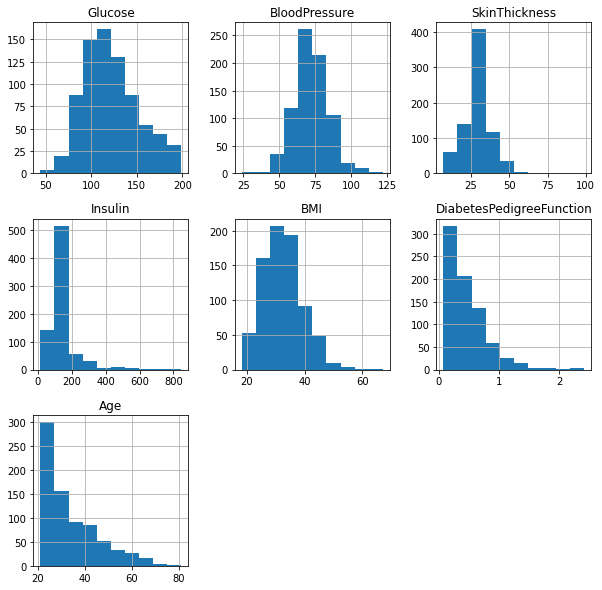

In [6]:
# s.iloc[:,["Pregnancies","DiabetesPedigreeFunction","Age", "Outcome"]]

# df.hist(figsize=(10,10))
s.hist(figsize=(10,10))


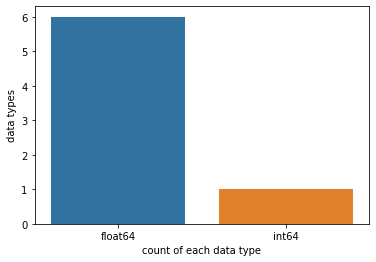

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=s.dtypes,data=s)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()


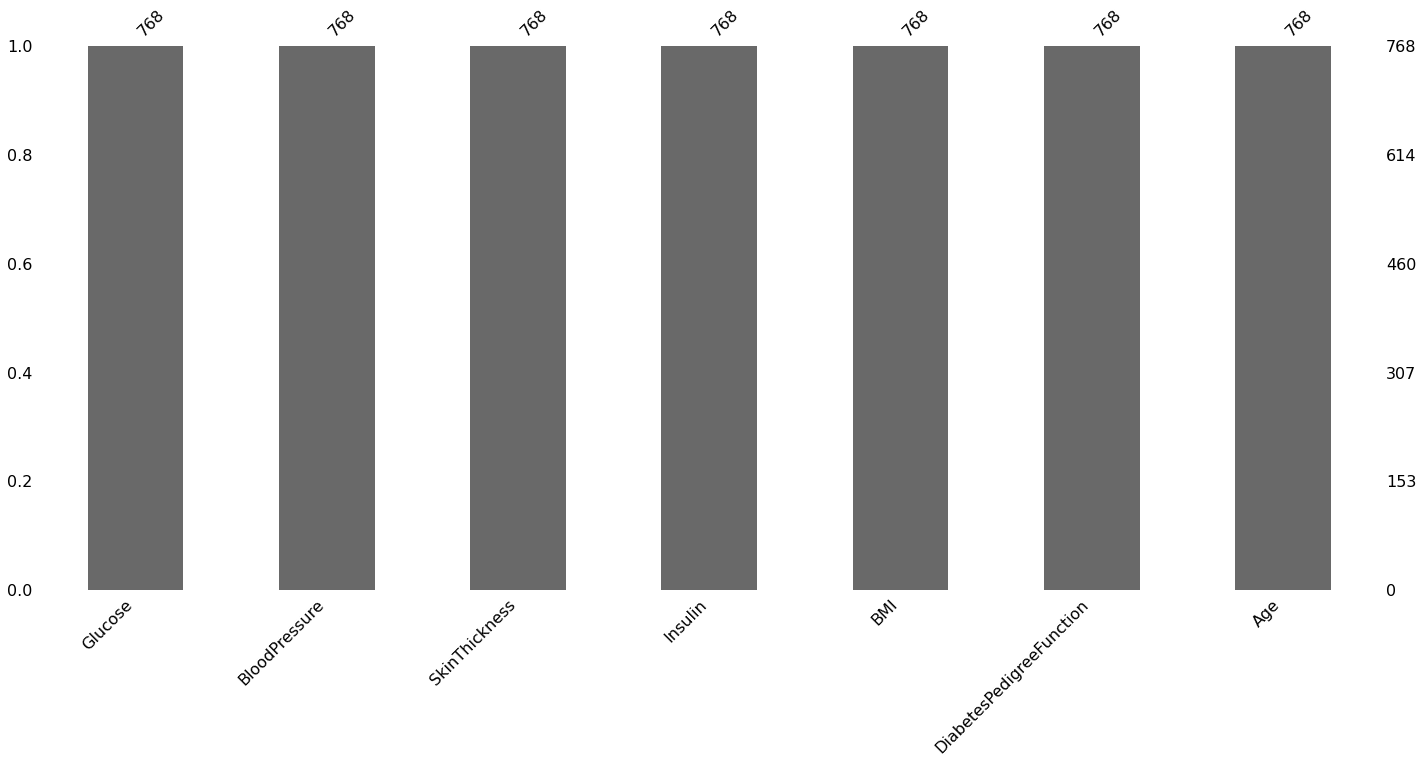

In [8]:
import missingno as msno
p=msno.bar(s)# for  null count analysis

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

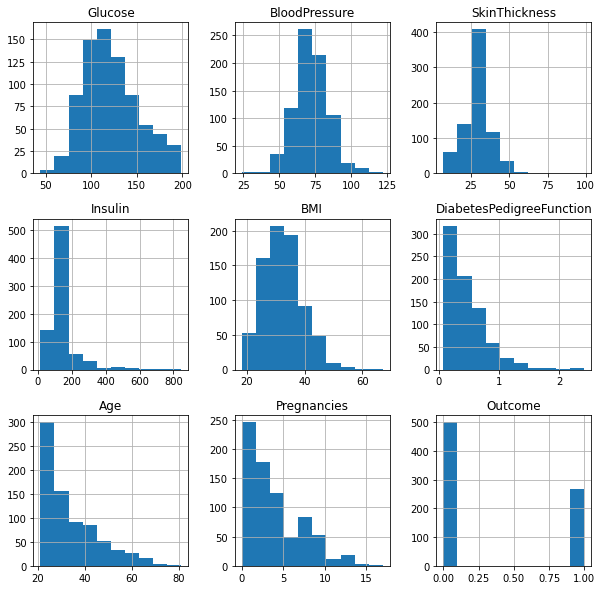

In [9]:
r=["Pregnancies","Outcome"]
z=diabetes[r]
update=pd.concat([s,z],join="outer",axis=1)#trick step
update.hist(figsize=(10,10))


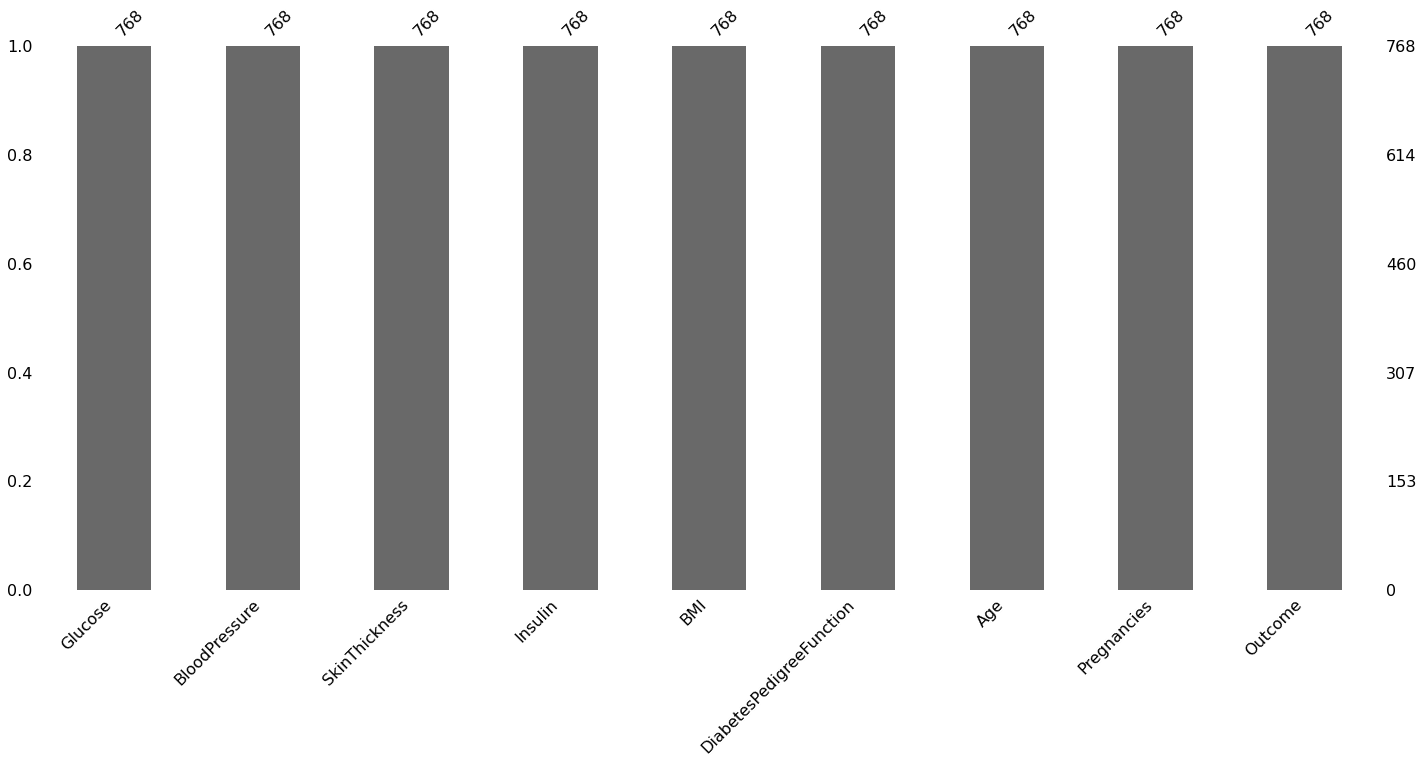

In [10]:
## null count analysis
import missingno as msno
p=msno.bar(update)

<AxesSubplot:>

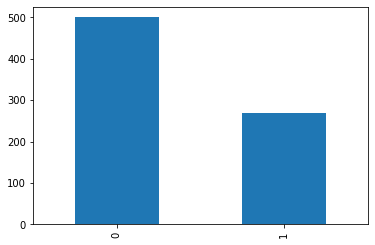

In [11]:
# print(update.Outcome.value_counts())
# update.Outcome.value_counts().plot(kind="bar")#visualise it 
b=update.Outcome.value_counts()
b.plot(kind="bar")

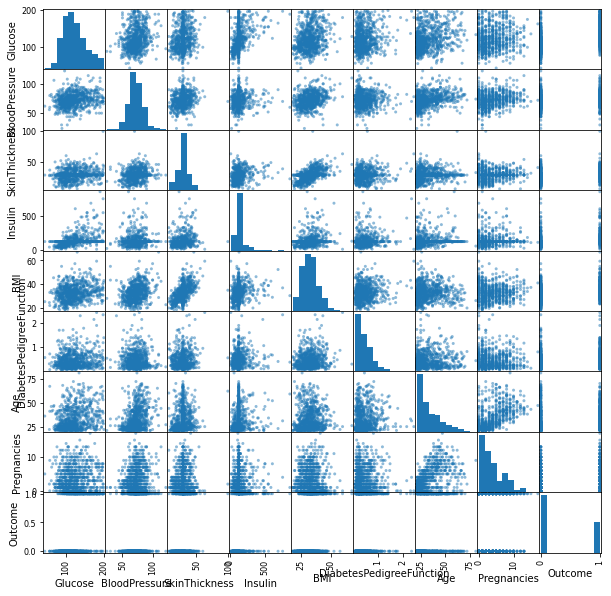

In [12]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(update,figsize=(10, 10))

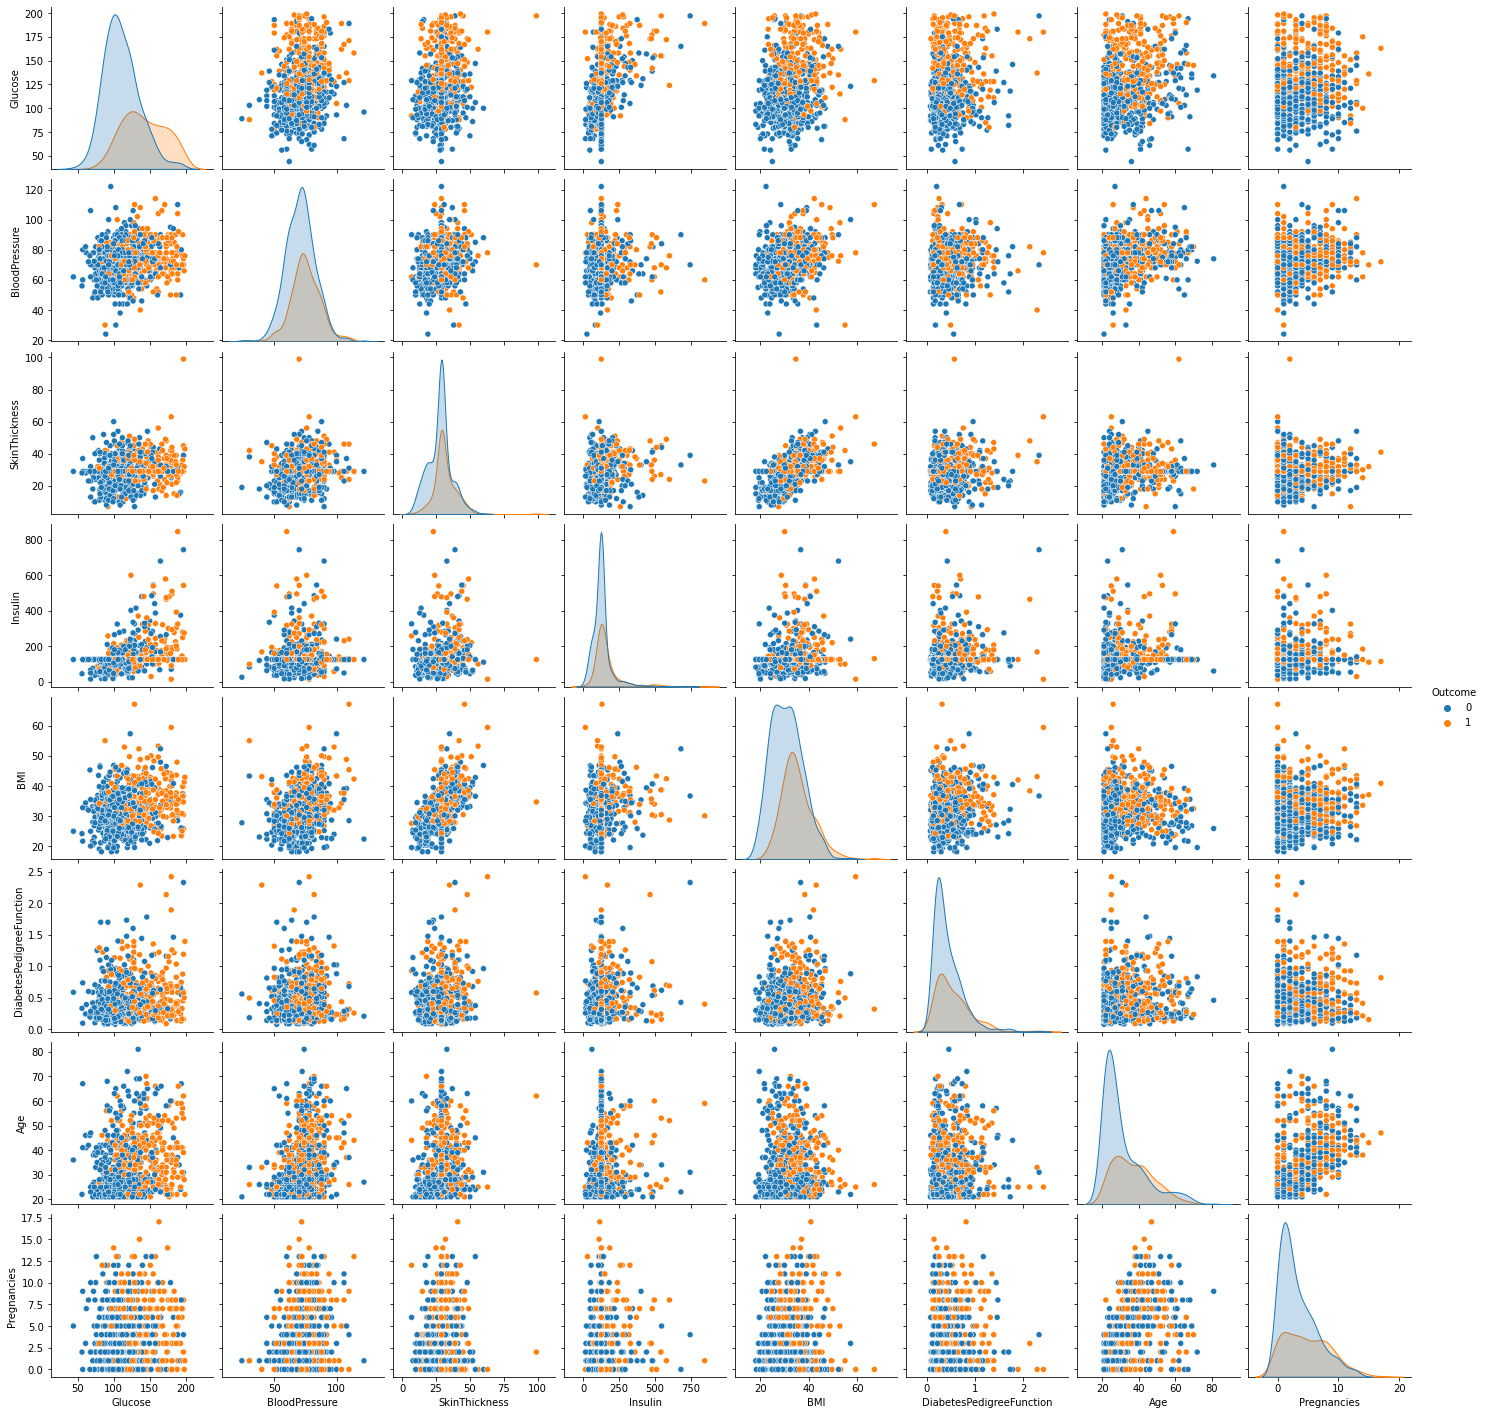

In [13]:
sns.pairplot(update,hue="Outcome")# finding relationship between every feature

<AxesSubplot:>

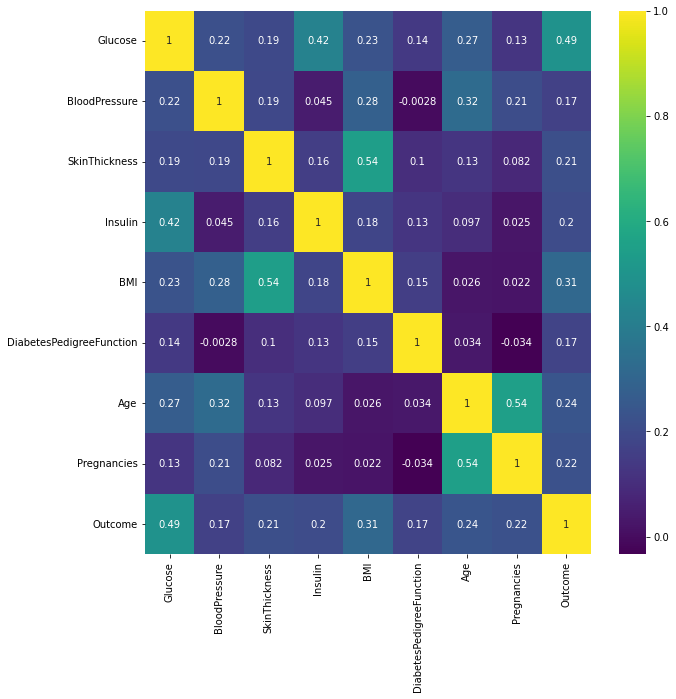

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=update.corr(),annot=True,cmap="viridis")

In [15]:
f1=update.drop(["Outcome"],axis=1)
from sklearn.preprocessing import StandardScaler
x=StandardScaler()
X=x.fit_transform(f1)
scaling=pd.DataFrame(X,columns=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Pregnancies"])
scaling

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,0.639947
1,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,-0.844885
2,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1.233880
3,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,-0.844885
4,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,-1.141852
...,...,...,...,...,...,...,...,...
763,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136,1.827813
764,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,-0.547919
765,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0.342981
766,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,-0.844885


In [16]:
#target and train set
y=update.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(f1,y,test_size=1/3,random_state=42,stratify=y)
# r1=train_x.reshape(-1,1)
# r2=train_y.reshape(-1,1)


In [18]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(train_x,train_y)
    
    train_scores.append(model.score(train_x,train_y))
    test_scores.append(model.score(val_x,val_y))
# train_scores
# test_scores


In [19]:
max_train_score = max(train_scores)
max_test_score=max(test_scores)
train_scores_ind=[i+1 for i,j in enumerate(train_scores) if j==max_train_score]
test_scores_ind=[i+1 for i,j in enumerate(test_scores) if j==max_test_score]
# test_scores_ind

# for i in range(len(test_scores)):
#     print(i+1,test_scores[i])     list(map(lambda x: x+1, test_scores_ind))))
print("the maximum training score is {}  and k ={}".format(max_train_score*100,*train_scores_ind))
print("the maximum validation score is {} and k={}".format(max_test_score*100,*test_scores_ind))


the maximum training score is 100.0  and k =1
the maximum validation score is 73.828125 and k=8


<AxesSubplot:>

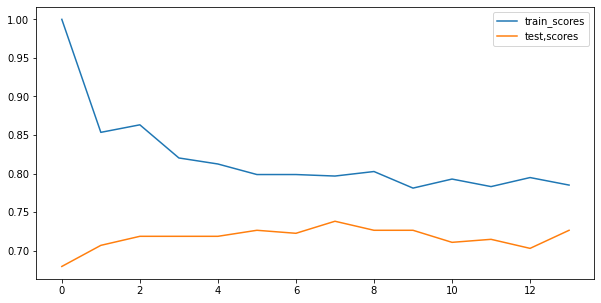

In [20]:
# visualise train set and val set

plt.figure(figsize=(10,5))
# plt.plot(train_scores)
# plt.plot(test_scores)
# plt.xlabel("trainscore")
# plt.ylabel("test score")
# for i in train_scores:
#     c=i
# #     print(c)
# for j in test_scores:
#     g=i
#     print(g)      
h=[train_scores,test_scores]
sns.lineplot(data=train_scores,label="train_scores") 
sns.lineplot(data=test_scores,label="test,scores")

In [21]:

from collections import Counter
model=KNeighborsClassifier(11)
model.fit(train_x,train_y)
preds=model.predict(val_x)
model.score(val_x,val_y)
z=Counter(preds)
z
# s=[i for i in preds]
# s.value_counts()
# dfi= pd.DataFrame(preds, columns=['values'])
# dfi["values"].value_counts()     

Counter({0: 171, 1: 85})

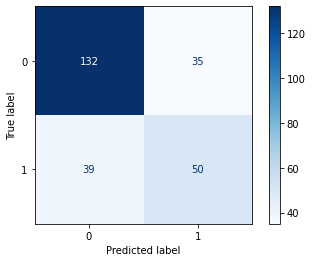

In [22]:
# df["Age"][4]
# confusion matrix

#from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
preds=model.predict(val_x)
c=confusion_matrix(val_y,preds)
d=ConfusionMatrixDisplay(c)
d.plot(cmap="Blues")
plt.show()
# plt.figure(figsize=(5,5))
# sns.heatmap(c, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [23]:
from sklearn.metrics import classification_report
report=classification_report(val_y,preds)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       167
           1       0.59      0.56      0.57        89

    accuracy                           0.71       256
   macro avg       0.68      0.68      0.68       256
weighted avg       0.71      0.71      0.71       256



0.7626993204602032


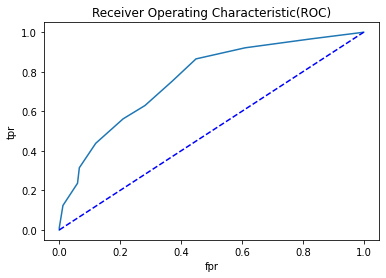

In [24]:
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
pre=model.predict_proba(val_x)[:,1]
pre1=model.predict(val_x)
# h=pd.DataFrame(pre)
fpr, tpr, thresholds = roc_curve(val_y, pre)
auc_score=auc(fpr,tpr)
print(auc_score)
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic(ROC)')

plt.plot([0, 1], [0, 1],'b--')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()
# plt.xlim([0, 1])
# plt.ylim([0,1])

In [25]:
#In the second case, you are using the prediction (not the probabilities), in that case, use 'predict' instead of 'predict_proba' 
#for both and you should get the same result.
# fp_rate, tp_rate, thresholds = roc_curve(val_y, pre1)
# print(auc(fp_rate, tp_rate))
# print(roc_auc_score(val_y,pre1))


from sklearn.metrics import roc_auc_score
roc_auc_score(val_y,pre)


0.7626993204602032

In [26]:
# hyper parameter tuning to generalize model better
import numpy as np
from sklearn.model_selection import GridSearchCV
modell=KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,50)}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(train_x,train_y)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'n_neighbors': 11}
Best score: 0.7657338663620787
